In [1]:
#|default_exp app

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr

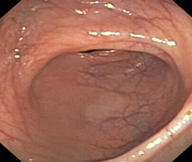

In [3]:
im = PILImage.create('colonoscopy.jpg')
im.thumbnail((192,192))
im

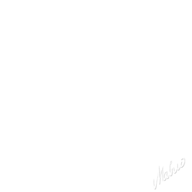

In [4]:
im2 = PILImage.create('white_square.jpg')
im2.thumbnail((192,192))
im2

In [5]:
#|export
learn = load_learner('export.pkl')

In [6]:
learn.predict(im)

('colonoscopy', TensorBase(0), TensorBase([1.0000e+00, 2.3704e-10]))

In [7]:
learn.predict(im2)

('not_colonoscopy', TensorBase(1), TensorBase([0.0482, 0.9518]))

In [8]:
#|export
def classify_img(img):
    pred, cl, probs = learn.predict(img)

    prob0 = float(probs[0])
    prob1 = float(probs[1])

    d = {
        "This is a colonoscopy photo --- probability:":prob0,
        "This is not a colonoscopy photo --- probability:":prob1
    }
    return d

In [9]:
classify_img(im)

{'This is a colonoscopy photo --- probability:': 1.0,
 'This is not a colonoscopy photo --- probability:': 2.3704227469778516e-10}

In [10]:
#|export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['colonoscopy.jpg','colonoscopy2.jpg','colonoscopy3.jpg','colonoscopy4.jpg', 'white_square.jpg','dog.jpeg','pinkroundball.jpeg','earthworm.jpg']

intf=gr.Interface(fn=classify_img, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

/home/karl/anaconda3/envs/fastai/lib/python3.8/site-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/karl/anaconda3/envs/fastai/lib/python3.8/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/home/karl/anaconda3/envs/fastai/lib/python3.8/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/home/karl/anaconda3/envs/fastai/lib/python3.8/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
